In [1]:
#bulk RNA-seq & Nanopore
#基于转录组测序技术分析冠状病毒基因组
%matplotlib inline
%load_ext autoreload
%autoreload 2
#%matplotlib inline可以在Notebook中直接显示图形输出，%load_ext autoreload和%autoreload 2用于自动重新加载模块

In [2]:
import os
os.chdir("D:/360MoveData/Users/dgwei/Desktop/BASIC/bulk_RNAseq/")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
orfcolors = pd.read_csv('SARS2-colorcode-rainbow.txt', sep=' ', names=['orf', 'color'], index_col=0)['color'].to_dict()
orfcolors

{'ORF1a': '#c5d9ea',
 'ORF1b': '#e8d2c4',
 'S': '#82c91e',
 'ORF3a': '#3bc9db',
 'E': '#228be6',
 'M': '#9fb1fc',
 'ORF6': '#7950f2',
 'ORF7a': '#da77f2',
 'ORF7b': '#e64980',
 'ORF8': '#fd7e14',
 'N': '#ffd43b',
 'ORF10': '#1997DE'}

In [4]:
anno = pd.read_csv('reference/SARS-CoV-2-annotations.gff', sep='\t', names=['chrom', 'type', 'name', 'start', 'end', 'x', 'y', 'z'])
anno

,chrom,type,name,start,end,x,y,z
0,chrSCV,CDS,E,26245,26472,0.0,.,.
1,chrSCV,CDS,M,26523,27191,0.0,.,.
2,chrSCV,CDS,N,28274,29533,0.0,.,.
3,chrSCV,CDS,ORF10,29558,29674,0.0,.,.
4,chrSCV,CDS,ORF3a,25393,26220,0.0,.,.
5,chrSCV,CDS,ORF6,27202,27387,0.0,.,.
6,chrSCV,CDS,ORF7a,27394,27759,0.0,.,.
7,chrSCV,CDS,ORF7b,27756,27887,0.0,.,.
8,chrSCV,CDS,ORF8,27894,28259,0.0,.,.
9,chrSCV,CDS,S,21563,25384,0.0,.,.


In [5]:
cdsanno = anno[anno['type'] == 'CDS']
#cdsanno = cdsanno.iloc[:10].sort_values(by='start').iloc[:9]
cdsanno = cdsanno.iloc[:10].sort_values(by='start')
#loc：通过行、列的名称或标签来索引
#iloc：通过行、列的索引位置来寻找数据
cdsanno = pd.concat([
    cdsanno,
    pd.DataFrame([
        pd.Series(['chrSCV', 'CDS', 'ORF1a', 266, 13468, '.', '.', '.'], index=cdsanno.columns),
        pd.Series(['chrSCV', 'CDS', 'ORF1b', 13468,21552, '.', '.', '.'], index=cdsanno.columns),
    ])])
cdsanno = cdsanno.sort_values(by='start').iloc[:, 2:5].reset_index(drop=True)
cdsanno['color'] = cdsanno['name'].apply(orfcolors.__getitem__)
cdsanno.to_pickle('./tmp/cdsannotation.pickle')
cdsanno

,name,start,end,color
0,ORF1a,266,13468,#c5d9ea
1,ORF1b,13468,21552,#e8d2c4
2,S,21563,25384,#82c91e
3,ORF3a,25393,26220,#3bc9db
4,E,26245,26472,#228be6
5,M,26523,27191,#9fb1fc
6,ORF6,27202,27387,#7950f2
7,ORF7a,27394,27759,#da77f2
8,ORF7b,27756,27887,#e64980
9,ORF8,27894,28259,#fd7e14


In [6]:
# viralcoverage1 = pd.read_csv('D:/360MoveData/Users/dgwei/Desktop/BASIC/二维数据分析流程/原始数据处理/SARS2/SARS2-danny-incell-rep1/SRR13020885.coverage.txt', sep='\t', names=['chrom', 'pos', 'count'])
# viralcoverage2 = pd.read_csv('D:/360MoveData/Users/dgwei/Desktop/BASIC/二维数据分析流程/原始数据处理/SARS2/SARS2-danny-incell-rep1/SRR13020886_1.coverage.txt', sep='\t', names=['chrom', 'pos', 'count'])
# viralcoverage3 = pd.read_csv('D:/360MoveData/Users/dgwei/Desktop/BASIC/二维数据分析流程/原始数据处理/SARS2/SARS2-danny-incell-rep1/SRR13020886_2.coverage.txt', sep='\t', names=['chrom', 'pos', 'count'])

In [12]:
viralcoverage1 = pd.read_csv('D:/360MoveData/Users/dgwei/Desktop/BASIC/二维数据分析流程/原始数据处理/SARS2/SARS2-danny-virion-rep1/SRR11859187.coverage.txt', sep='\t', names=['chrom', 'pos', 'count'])
viralcoverage2 = pd.read_csv('D:/360MoveData/Users/dgwei/Desktop/BASIC/二维数据分析流程/原始数据处理/SARS2/SARS2-danny-virion-rep1/SRR11859188.coverage.txt', sep='\t', names=['chrom', 'pos', 'count'])
viralcoverage3 = pd.read_csv('D:/360MoveData/Users/dgwei/Desktop/BASIC/二维数据分析流程/原始数据处理/SARS2/SARS2-danny-virion-rep1/SRR11859185.coverage.txt', sep='\t', names=['chrom', 'pos', 'count'])
viralcoverage4 = pd.read_csv('D:/360MoveData/Users/dgwei/Desktop/BASIC/二维数据分析流程/原始数据处理/SARS2/SARS2-danny-virion-rep1/SRR11859186.coverage.txt', sep='\t', names=['chrom', 'pos', 'count'])

In [13]:
merged_mod = pd.concat([viralcoverage1, viralcoverage2]).groupby(['chrom', 'pos']).mean().reset_index()#reset_index() 函数重置索引
merged_unmod = pd.concat([viralcoverage3, viralcoverage4]).groupby(['chrom', 'pos']).mean().reset_index()

In [7]:
# merged_unmod=viralcoverage1
# merged_mod = pd.concat([viralcoverage2, viralcoverage3]).groupby(['chrom', 'pos']).mean().reset_index()#reset_index() 函数重置索引

In [14]:
STRIDESIZE = 30
plt.rcParams['ytick.labelright'] = True
plt.rcParams['ytick.labelleft'] = False
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.left'] = False

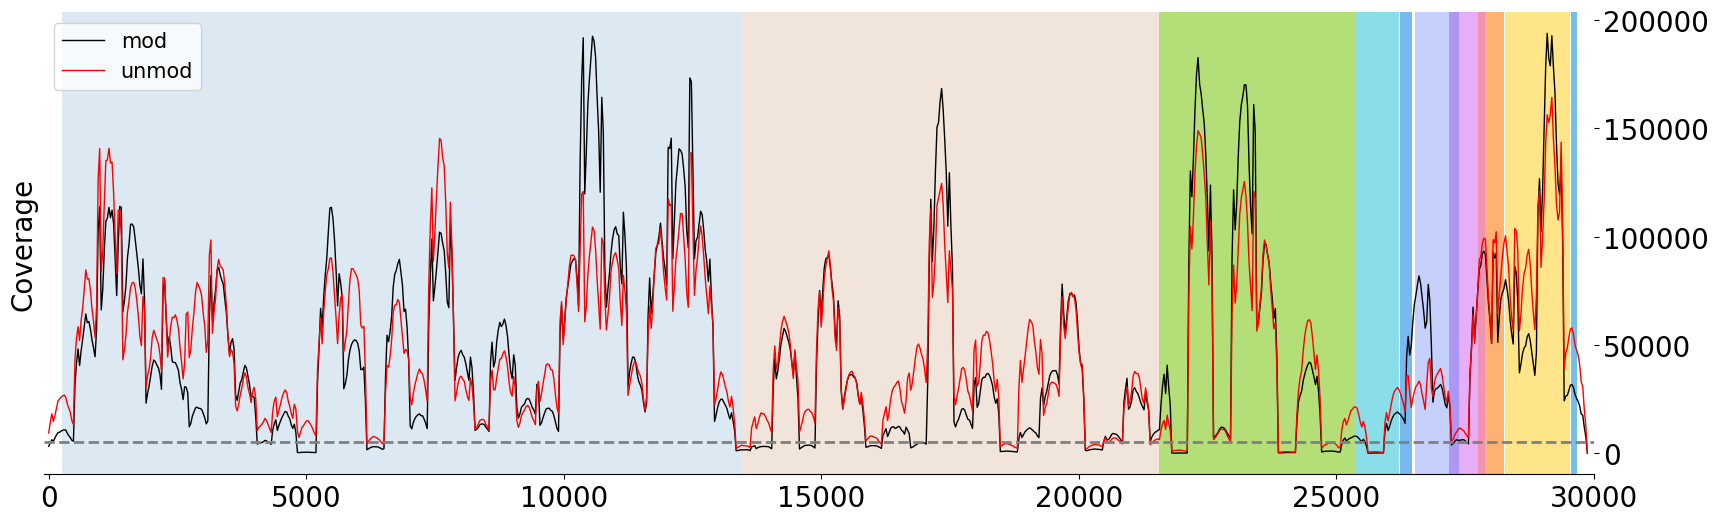

In [17]:
def plot_hist(ax, data1,data2, title):
    data1 = data1.copy()
    data2 = data2.copy()
    data1['binpos'] = np.floor(data1['pos'] / STRIDESIZE).astype(int) * STRIDESIZE
    data2['binpos'] = np.floor(data2['pos'] / STRIDESIZE).astype(int) * STRIDESIZE
    medcov1 = data1.groupby('binpos').agg({'count': 'median'})
    medcov2 = data2.groupby('binpos').agg({'count': 'median'})

    ax.plot(medcov1.index, medcov1['count'].tolist(), c='black', lw=1, label='mod')
    ax.plot(medcov2.index, medcov2['count'].tolist(), c='red', lw=1, label='unmod')
    ax.set_xlim(-100, 30000)
    ax.set_ylabel(title,fontsize=20)
    ax.legend(fontsize=15)

    for _, row in cdsanno.iterrows():
        ax.axvspan(row['start'], row['end'], fc=row['color'], alpha=.6, zorder=1)
    for spside in 'top left right'.split():#图的上、左、右边框设置为不可见
        plt.setp(ax.spines[spside], visible=False)

    ax.grid(False)#行网格线
    # plt.setp(ax.get_xgridlines(), visible=True)#列网格线
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.axhline(y=5000, color='gray', linestyle='--', linewidth=2)#添加参考线


fig, axes = plt.subplots(1, 1, figsize=(20, 6))
plot_hist(axes, merged_mod,merged_unmod, 'Coverage')

plt.savefig('D:/360MoveData/Users/dgwei/Desktop/BASIC/二维数据分析流程/原始数据处理/SARS2/SARS2-danny-virion-rep1/SARS2-virion-coverage.png')